In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

PROJ_ROOT=os.path.abspath(os.path.join(os.pardir))
%matplotlib inline

In [14]:
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
from data.preprocess import read_raw_data, read_config


In [15]:
raw_data_filename = os.path.join(PROJ_ROOT, 'data', 'raw', 'iris.csv')
PARAMS = os.path.join(PROJ_ROOT, 'params.yml')

In [16]:
config = read_config(PARAMS)

In [17]:
feature_cols = config['feature_cols']
response_col = config['response_col']
header = feature_cols + response_col

In [18]:
df = read_raw_data(raw_data_filename)
df.columns = header

# Overview of the data

In [19]:
print(df.head(20))

    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

# Data dimensions
Shape and data type

In [20]:
print(df.shape)

(150, 5)


In [21]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


# Descriptive Stats
Look for presence of NA values

In [22]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count       150.000      150.000       150.000      150.000
mean          5.843        3.054         3.759        1.199
std           0.828        0.434         1.764        0.763
min           4.300        2.000         1.000        0.100
25%           5.100        2.800         1.600        0.300
50%           5.800        3.000         4.350        1.300
75%           6.400        3.300         5.100        1.800
max           7.900        4.400         6.900        2.500


# Correlated features
Using heatmap and pair plot/ scatter plot

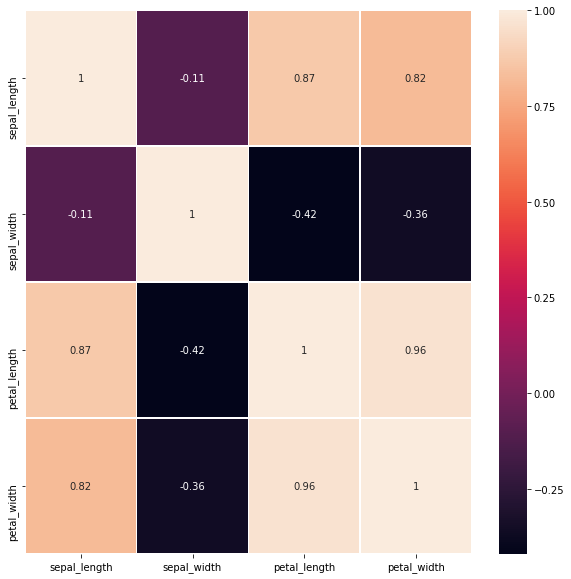

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[feature_cols].corr(), annot=True, linewidths=.5, ax=ax)

/Users/spica/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


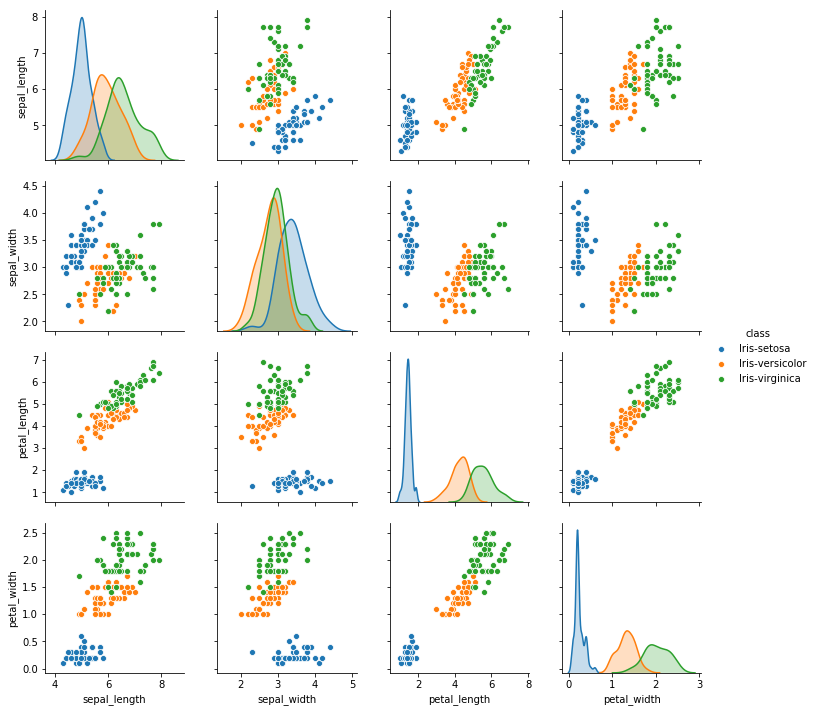

In [24]:
sns.pairplot(df, vars=feature_cols, hue=''.join(response_col))

# Classification Distribution (Classification Only)

In [25]:
print(df.groupby(by='class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Univariate distributions
Check for Gaussian distributions as ML algorithms assume them to be normally distributed

## Histogram

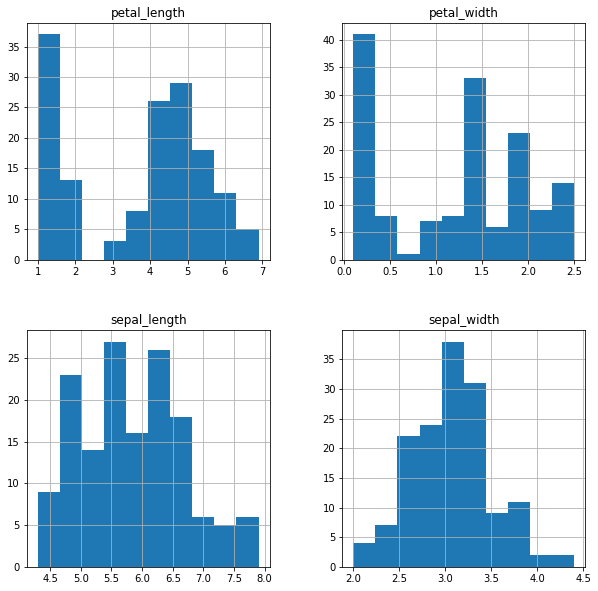

In [26]:
df.hist(figsize=(10,10))
plt.show()
# plt.savefig('hist.png')

## Density Plot [Preferred]

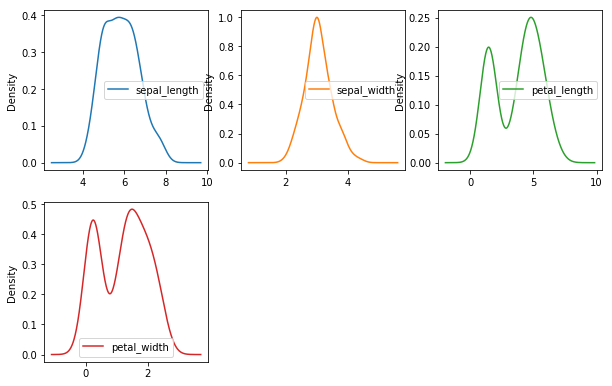

In [27]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))
plt.show()

In [28]:
# Skewness - Postive (right), Negative (left), Close to zero (less skew)
print(df.skew())

sepal_length    0.315
sepal_width     0.334
petal_length   -0.274
petal_width    -0.105
dtype: float64


# Box and Whisker
If data is numeric, box and whisker plot gives a clearer view of the distribution of the features

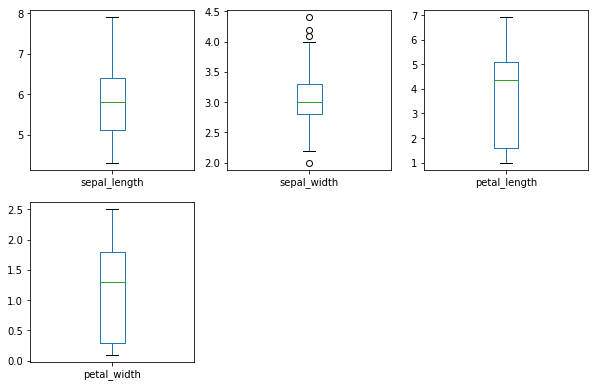

In [29]:
df.plot(kind='box', subplots=True, sharex=False, layout=(3,3), sharey=False, figsize=(10,10))
plt.show()

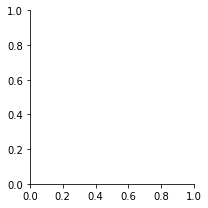

In [31]:
sns.FacetGrid(df)